# <font color = "blue"> Importance of Feature Engineering

* Feature engineering is a crucial process in data science that involves transforming raw data into meaningful features that better represent the underlying problem to predictive models, resulting in improved performance. 

* Features are the inputs used by machine learning models to make predictions or classifications. 

* Effective feature engineering can significantly enhance the accuracy and efficiency of a model.

### <font color="blue"> Let us try to understand that with a case study

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data file**

In [147]:
data = pd.read_excel("../data/InsuranceLosses.xlsx")

In [148]:
df = data.copy() #Creating a shallow copy

**Checking the basic description of the data**

In [149]:
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,150024,24,5,1,M,Married,11,P,203.319595
1,144880,31,10,1,F,Single,6,P,402.197302
2,133742,56,37,1,M,Married,0,D,553.132096
3,151282,52,31,1,F,Married,15,P,292.430579
4,174407,20,3,1,M,Single,15,P,246.540576


In [150]:
df.tail()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
15285,189499,61,43,4,F,Single,11,P,58.426429
15286,142111,69,48,4,F,Married,9,P,304.519134
15287,176444,69,51,4,F,Married,13,P,282.149148
15288,180420,22,4,4,M,Married,9,D,822.470554
15289,157201,20,2,4,F,Married,2,P,406.924740


**Data Cleaning**

In [151]:
df.drop("Policy Number", axis=1, inplace=True)
df.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,24,5,1,M,Married,11,P,203.319595
1,31,10,1,F,Single,6,P,402.197302
2,56,37,1,M,Married,0,D,553.132096
3,52,31,1,F,Married,15,P,292.430579
4,20,3,1,M,Single,15,P,246.540576


Plotting the target variable to see its distribution.

<Axes: xlabel='Losses', ylabel='Count'>

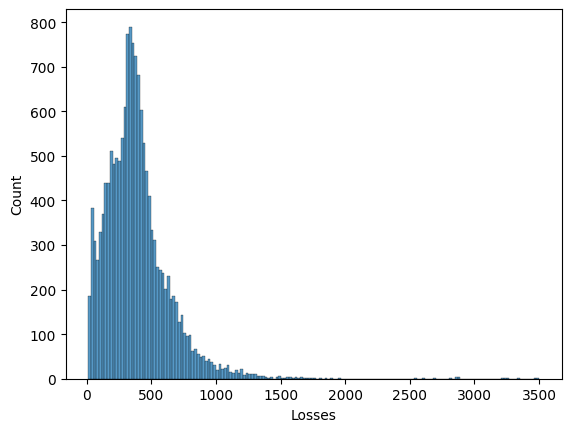

In [152]:
sns.histplot(data=df, x="Losses")

Since the target variable is skewed, let us go ahead and standardize it using log transformation.

In [153]:
df['Norm_Losses']=np.log(df.Losses)
df.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses,Norm_Losses
0,24,5,1,M,Married,11,P,203.319595,5.314779
1,31,10,1,F,Single,6,P,402.197302,5.996943
2,56,37,1,M,Married,0,D,553.132096,6.315597
3,52,31,1,F,Married,15,P,292.430579,5.678227
4,20,3,1,M,Single,15,P,246.540576,5.507527


Removing the Losses column because we do not need it anymore.

In [154]:
df.drop("Losses", axis=1, inplace=True)
df.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses
0,24,5,1,M,Married,11,P,5.314779
1,31,10,1,F,Single,6,P,5.996943
2,56,37,1,M,Married,0,D,6.315597
3,52,31,1,F,Married,15,P,5.678227
4,20,3,1,M,Single,15,P,5.507527


**Creating copy of the data for original and feature engineering dataset**

In [155]:
df_org = df.copy()
df_fte = df.copy()

### <font color="blue"> Building the model with original data

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [157]:
df_org.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses
0,24,5,1,M,Married,11,P,5.314779
1,31,10,1,F,Single,6,P,5.996943
2,56,37,1,M,Married,0,D,6.315597
3,52,31,1,F,Married,15,P,5.678227
4,20,3,1,M,Single,15,P,5.507527


Splitting data into independent and dependent datasets.

In [158]:
X_org = df_org.drop("Norm_Losses", axis=1)
y_org = df_org['Norm_Losses']

Creating dummy variables of the independent dataset.

In [159]:
X_org = pd.get_dummies(data=X_org,
                       columns=X_org.select_dtypes(include="object").columns.to_list(),
                       drop_first=True,
                       dtype=int)

X_org.head()

,Age,Years of Driving Experience,Number of Vehicles,Vehicle Age,Gender_M,Married_Single,Fuel Type_P
0,24,5,1,11,1,0,1
1,31,10,1,6,0,1,1
2,56,37,1,0,1,0,0
3,52,31,1,15,0,0,1
4,20,3,1,15,1,1,1


Splitting the data into train and test

In [160]:
X_org_train, X_org_test, y_org_train, y_org_test = train_test_split(X_org, y_org, test_size=0.3, random_state=1)

Building the model

In [161]:
lr_org = LinearRegression()
lr_org.fit(X_org_train, y_org_train)

LinearRegression()

Predicting the output

In [162]:
train_org_pred = lr_org.predict(X_org_train)
test_org_pred = lr_org.predict(X_org_test)

Checking R2 of the model

In [163]:
train_org_r2 = r2_score(y_true=y_org_train, y_pred = train_org_pred)
test_org_r2 = r2_score(y_true=y_org_test, y_pred = test_org_pred )

print(train_org_r2)
print(test_org_r2)

0.5421368962134521
0.5435895592254312


Checking RMSE of the model

In [164]:
train_org_rmse = root_mean_squared_error(y_true=y_org_train, y_pred = train_org_pred)
test_org_rmse = root_mean_squared_error(y_true=y_org_test, y_pred = test_org_pred )

print(train_org_rmse)
print(test_org_rmse)

0.49758827398796085
0.4935537593989357


### <font color="blue"> Let us do Feature Engineering now

In [165]:
df_fte.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses
0,24,5,1,M,Married,11,P,5.314779
1,31,10,1,F,Single,6,P,5.996943
2,56,37,1,M,Married,0,D,6.315597
3,52,31,1,F,Married,15,P,5.678227
4,20,3,1,M,Single,15,P,5.507527


**Binning the data and creating categories**

In [166]:
df_fte['Years of Driving Experience'].describe()

count    15290.000000
mean        23.732897
std         17.850707
min          0.000000
25%          6.000000
50%         23.000000
75%         42.000000
max         53.000000
Name: Years of Driving Experience, dtype: float64

In [167]:
df_fte['Driving Experience'] = pd.cut(
    df['Years of Driving Experience'],
    bins=[-1, 6, 23, float('inf')],
    labels=['Low', 'Medium', 'High']
)

df_fte.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses,Driving Experience
0,24,5,1,M,Married,11,P,5.314779,Low
1,31,10,1,F,Single,6,P,5.996943,Medium
2,56,37,1,M,Married,0,D,6.315597,High
3,52,31,1,F,Married,15,P,5.678227,High
4,20,3,1,M,Single,15,P,5.507527,Low


In [168]:
df_fte['Vehicle Age'].describe()

count    15290.000000
mean         8.655723
std          4.344536
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         15.000000
Name: Vehicle Age, dtype: float64

In [169]:
df_fte['Vehicle_Age_Category']=pd.cut(
    df['Vehicle Age'],
    bins=[-1, 9, float('inf')],
    labels=['New', 'Old']
)

df_fte.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses,Driving Experience,Vehicle_Age_Category
0,24,5,1,M,Married,11,P,5.314779,Low,Old
1,31,10,1,F,Single,6,P,5.996943,Medium,New
2,56,37,1,M,Married,0,D,6.315597,High,New
3,52,31,1,F,Married,15,P,5.678227,High,Old
4,20,3,1,M,Single,15,P,5.507527,Low,Old


**Creating Indicator Fields**

Creating features for old petrol and old diesel vehicles

In [170]:
df_fte['Old_Diesel'] = ((df_fte.Vehicle_Age_Category == 'Old') & (df_fte['Fuel Type'] == 'D')).astype(int)
df_fte['Old_Petrol'] = ((df_fte.Vehicle_Age_Category == 'Old') & (df_fte['Fuel Type'] == 'P')).astype(int)

df_fte.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses,Driving Experience,Vehicle_Age_Category,Old_Diesel,Old_Petrol
0,24,5,1,M,Married,11,P,5.314779,Low,Old,0,1
1,31,10,1,F,Single,6,P,5.996943,Medium,New,0,0
2,56,37,1,M,Married,0,D,6.315597,High,New,0,0
3,52,31,1,F,Married,15,P,5.678227,High,Old,0,1
4,20,3,1,M,Single,15,P,5.507527,Low,Old,0,1


Creating features for single males and single females.

In [171]:
df_fte['Single_Males'] =((df_fte.Gender == 'M') & (df.Married == 'Single')).astype(int)
df_fte['Single_Females'] =((df_fte.Gender == 'F') & (df.Married == 'Single')).astype(int)

df_fte.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses,Driving Experience,Vehicle_Age_Category,Old_Diesel,Old_Petrol,Single_Males,Single_Females
0,24,5,1,M,Married,11,P,5.314779,Low,Old,0,1,0,0
1,31,10,1,F,Single,6,P,5.996943,Medium,New,0,0,0,1
2,56,37,1,M,Married,0,D,6.315597,High,New,0,0,0,0
3,52,31,1,F,Married,15,P,5.678227,High,Old,0,1,0,0
4,20,3,1,M,Single,15,P,5.507527,Low,Old,0,1,1,0


**Creating ratio variables**

Creating a column risk value which is vehicle age divided by Years of Driving Experience. In case a vehicle is new or old, and the years of experience is less, the value of risk will be high. Also, if the vehicle is new, and the years of experience is high then the risk will be lower.

There can be values where vehicle age can be 0 and risk value would be calculated as 0.
On the other hand we can have Years of driving experience as 0 and the risk value would turn out to be inf.

Hence, taking the idea from laplace correction adding 1 to the numerator and 1 to denominator and then doing the division can help to remove this problem.

In [172]:
df_fte['Risk_Value'] = (df_fte['Vehicle Age'] + 1)/(df_fte['Years of Driving Experience'] + 1)

df_fte.head()

,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Norm_Losses,Driving Experience,Vehicle_Age_Category,Old_Diesel,Old_Petrol,Single_Males,Single_Females,Risk_Value
0,24,5,1,M,Married,11,P,5.314779,Low,Old,0,1,0,0,2.000000
1,31,10,1,F,Single,6,P,5.996943,Medium,New,0,0,0,1,0.636364
2,56,37,1,M,Married,0,D,6.315597,High,New,0,0,0,0,0.026316
3,52,31,1,F,Married,15,P,5.678227,High,Old,0,1,0,0,0.500000
4,20,3,1,M,Single,15,P,5.507527,Low,Old,0,1,1,0,4.000000


### <font color="blue"> Building the model with feature engineered data

Splitting data into independent and dependent datasets.

In [173]:
X_fte = df_fte.drop("Norm_Losses", axis=1)
y_fte = df_fte['Norm_Losses']

Creating dummy variables of the independent dataset.

In [174]:
X_fte = pd.get_dummies(data=X_fte,
                       columns=X_fte.select_dtypes(include=["object","category"]).columns.to_list(),
                       drop_first=True,
                       dtype=int)

X_fte.head()

,Age,Years of Driving Experience,Number of Vehicles,Vehicle Age,Old_Diesel,Old_Petrol,Single_Males,Single_Females,Risk_Value,Gender_M,Married_Single,Fuel Type_P,Driving Experience_Medium,Driving Experience_High,Vehicle_Age_Category_Old
0,24,5,1,11,0,1,0,0,2.000000,1,0,1,0,0,1
1,31,10,1,6,0,0,0,1,0.636364,0,1,1,1,0,0
2,56,37,1,0,0,0,0,0,0.026316,1,0,0,0,1,0
3,52,31,1,15,0,1,0,0,0.500000,0,0,1,0,1,1
4,20,3,1,15,0,1,1,0,4.000000,1,1,1,0,0,1


Splitting the data into train and test

In [175]:
X_fte_train, X_fte_test, y_fte_train, y_fte_test = train_test_split(X_fte, y_fte, test_size=0.3, random_state=1)

Building the model

In [176]:
lr_fte = LinearRegression()
lr_fte.fit(X_fte_train, y_fte_train)

LinearRegression()

Predicting the output

In [177]:
train_fte_pred = lr_fte.predict(X_fte_train)
test_fte_pred = lr_fte.predict(X_fte_test)

Checking R2 of the model

In [178]:
train_fte_r2 = r2_score(y_true=y_fte_train, y_pred=train_fte_pred)
test_fte_r2 = r2_score(y_true=y_fte_test, y_pred=test_fte_pred)

print(train_fte_r2)
print(test_fte_r2)

0.5684505870241578
0.5739652067053207


Checking RMSE of the model

In [179]:
train_fte_rmse = root_mean_squared_error(y_true=y_fte_train, y_pred=train_fte_pred)
test_fte_rmse = root_mean_squared_error(y_true=y_fte_test, y_pred=test_fte_pred)

print(train_fte_rmse)
print(test_fte_rmse)

0.483078354679924
0.4768471739511019


## <font color="blue"> Comparing the original and feature engineered results

In [180]:
metrics = {
    'Train R2': [train_org_r2, train_fte_r2],
    'Test R2': [test_org_r2, test_fte_r2],
    'Train RMSE': [train_org_rmse, train_fte_rmse],
    'Test RMSE': [test_org_rmse, test_fte_rmse]
}

metrics_df = pd.DataFrame(metrics, index=['Original Data', 'Feature Engineered Data'])

metrics_df

,Train R2,Test R2,Train RMSE,Test RMSE
Original Data,0.542137,0.543590,0.497588,0.493554
Feature Engineered Data,0.568451,0.573965,0.483078,0.476847


### <font color="blue"> Conclusion

We can see clearly that after doing feature engineering that:

* We get a better R2 and the model is able to explain the variance better for both training and test datasets.
* The RMSE values get lower signifying better model predictions with fewer errors.

Hence, we can conclude that feature engineering can give us:
* Improved Model Accuracy
* Better Generalization
* Enhanced Interpretability